Repeat the same steps using a different classifier.

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
# print labels of every 50th images in digits dataset

for i in range(0, len(digits.data), 50):
    print(digits.target[i])
    

0
2
4
0
1
4
7
7
4
4
8
6
2
4
2
6
4
5
4
3
1
1
9
8
7
1
3
3
2
5
1
5
2
5
5
3


In [5]:
# print the digits dataset shape
print(digits.data.shape)

(1797, 64)


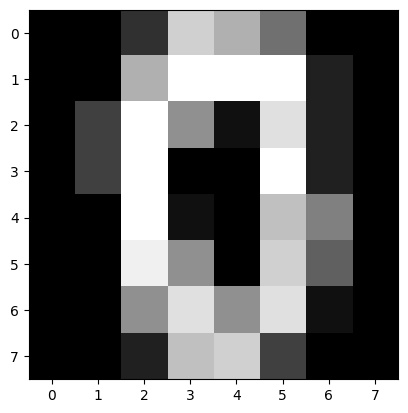

In [6]:
# print the image at index 20
import matplotlib.pyplot as plt
plt.imshow(digits.images[20], cmap='gray')
plt.show()

In [7]:
# print the label of image at index 20
print(digits.target[20])

0


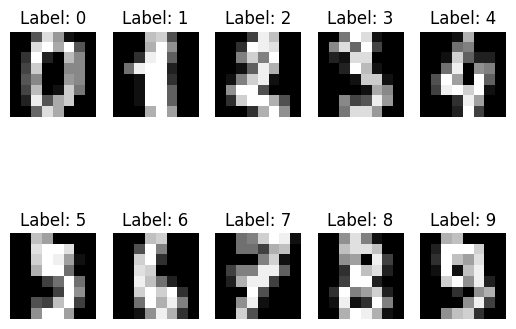

In [8]:
# use matplotlib.pyplot library to print 10 images
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20)


In [10]:
# print the shape of train dataset
print(X_train.shape)

(1437, 64)


In [11]:
# print the shape of test dataset
print(X_test.shape)

(360, 64)


In [12]:
from sklearn.svm import SVC

In [13]:
svc = SVC()

In [14]:
svc.fit(X=X_train, y=y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
predicted = svc.predict(X=X_test)

In [16]:
expected = y_test

In [17]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [18]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [19]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [20]:
wrong

[(np.int64(5), np.int64(3)),
 (np.int64(9), np.int64(7)),
 (np.int64(7), np.int64(9)),
 (np.int64(7), np.int64(3)),
 (np.int64(8), np.int64(3))]

In [21]:
print(f'{svc.score(X_test, y_test):.2%}')

98.61%


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
# print the confusion matrix
cm = confusion_matrix(y_true=expected, y_pred=predicted)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  1  0  1  1  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  1  0 36]]


In [24]:
from sklearn.metrics import classification_report

In [ ]:
# print the classification report and compare the results with the KNN classifier.
cr = classification_report(y_true=expected, y_pred=predicted)
print(cr)

# The SVC classifier has a higher precision, recall, and F1-score compared to the KNN classifier.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.93      0.96        41
           4       1.00      1.00      1.00        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      0.97      0.96        36
           8       0.97      1.00      0.99        34
           9       0.97      0.97      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

